In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [15]:
# Exploring data and visualize
# Train and create a Linear Regression model 
# Evaluate our model
# Make Predictions
# Calculate RMSE
# What if more/less features were added? Will we be better/worse off?

In [19]:
 house = pd.read_csv('Housing Price Prediction.csv')

In [23]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [26]:
house.info()
#data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [28]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [30]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'Price of House')

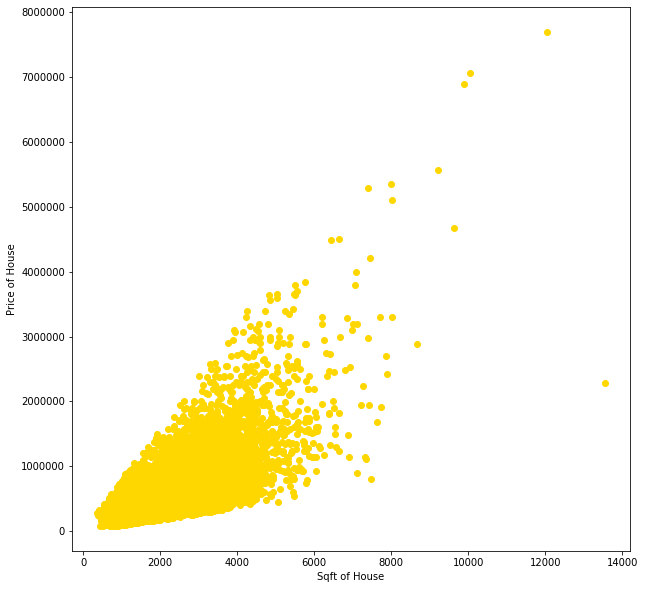

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(house.sqft_living, house.price, color='gold')
plt.xlabel('Sqft of House')
plt.ylabel('Price of House')

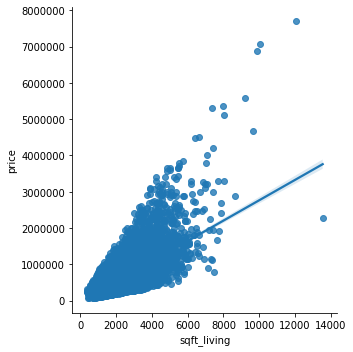

In [119]:
sns.lmplot('sqft_living', 'price', data=house)

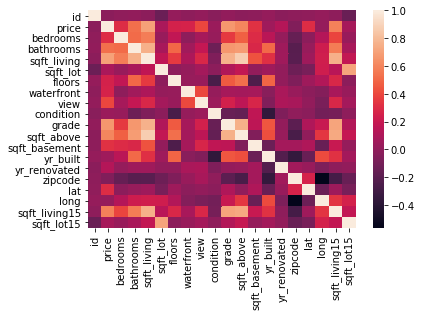

In [128]:
sns.heatmap(house.corr())

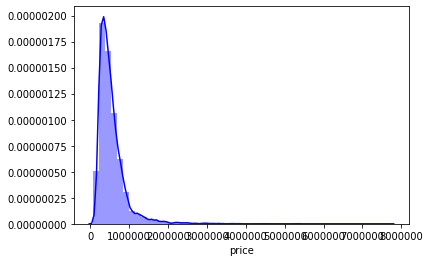

In [60]:
sns.distplot(house['price'], color='blue')

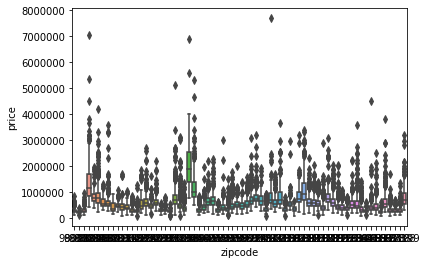

In [63]:
sns.boxplot(x='zipcode', y='price', data=house)

In [75]:
# Splitting data for training and testing
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
              'sqft_lot15', 'yr_built', 'condition', 'zipcode']]
y = house['price']

In [85]:
from sklearn.model_selection import train_test_split

In [ ]:
# training 75% , testing 25%

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=7)

In [97]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15117, 10) (15117,)
(6480, 10) (6480,)


In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()

In [105]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
prediction = model.predict(X_test)

In [107]:
house1 = house[house['id'] == 6414100192]

In [108]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639


In [109]:
house1['price']

1    538000.0
Name: price, dtype: float64

In [112]:
prediction[1]
# Prediction is good

679082.7299224073

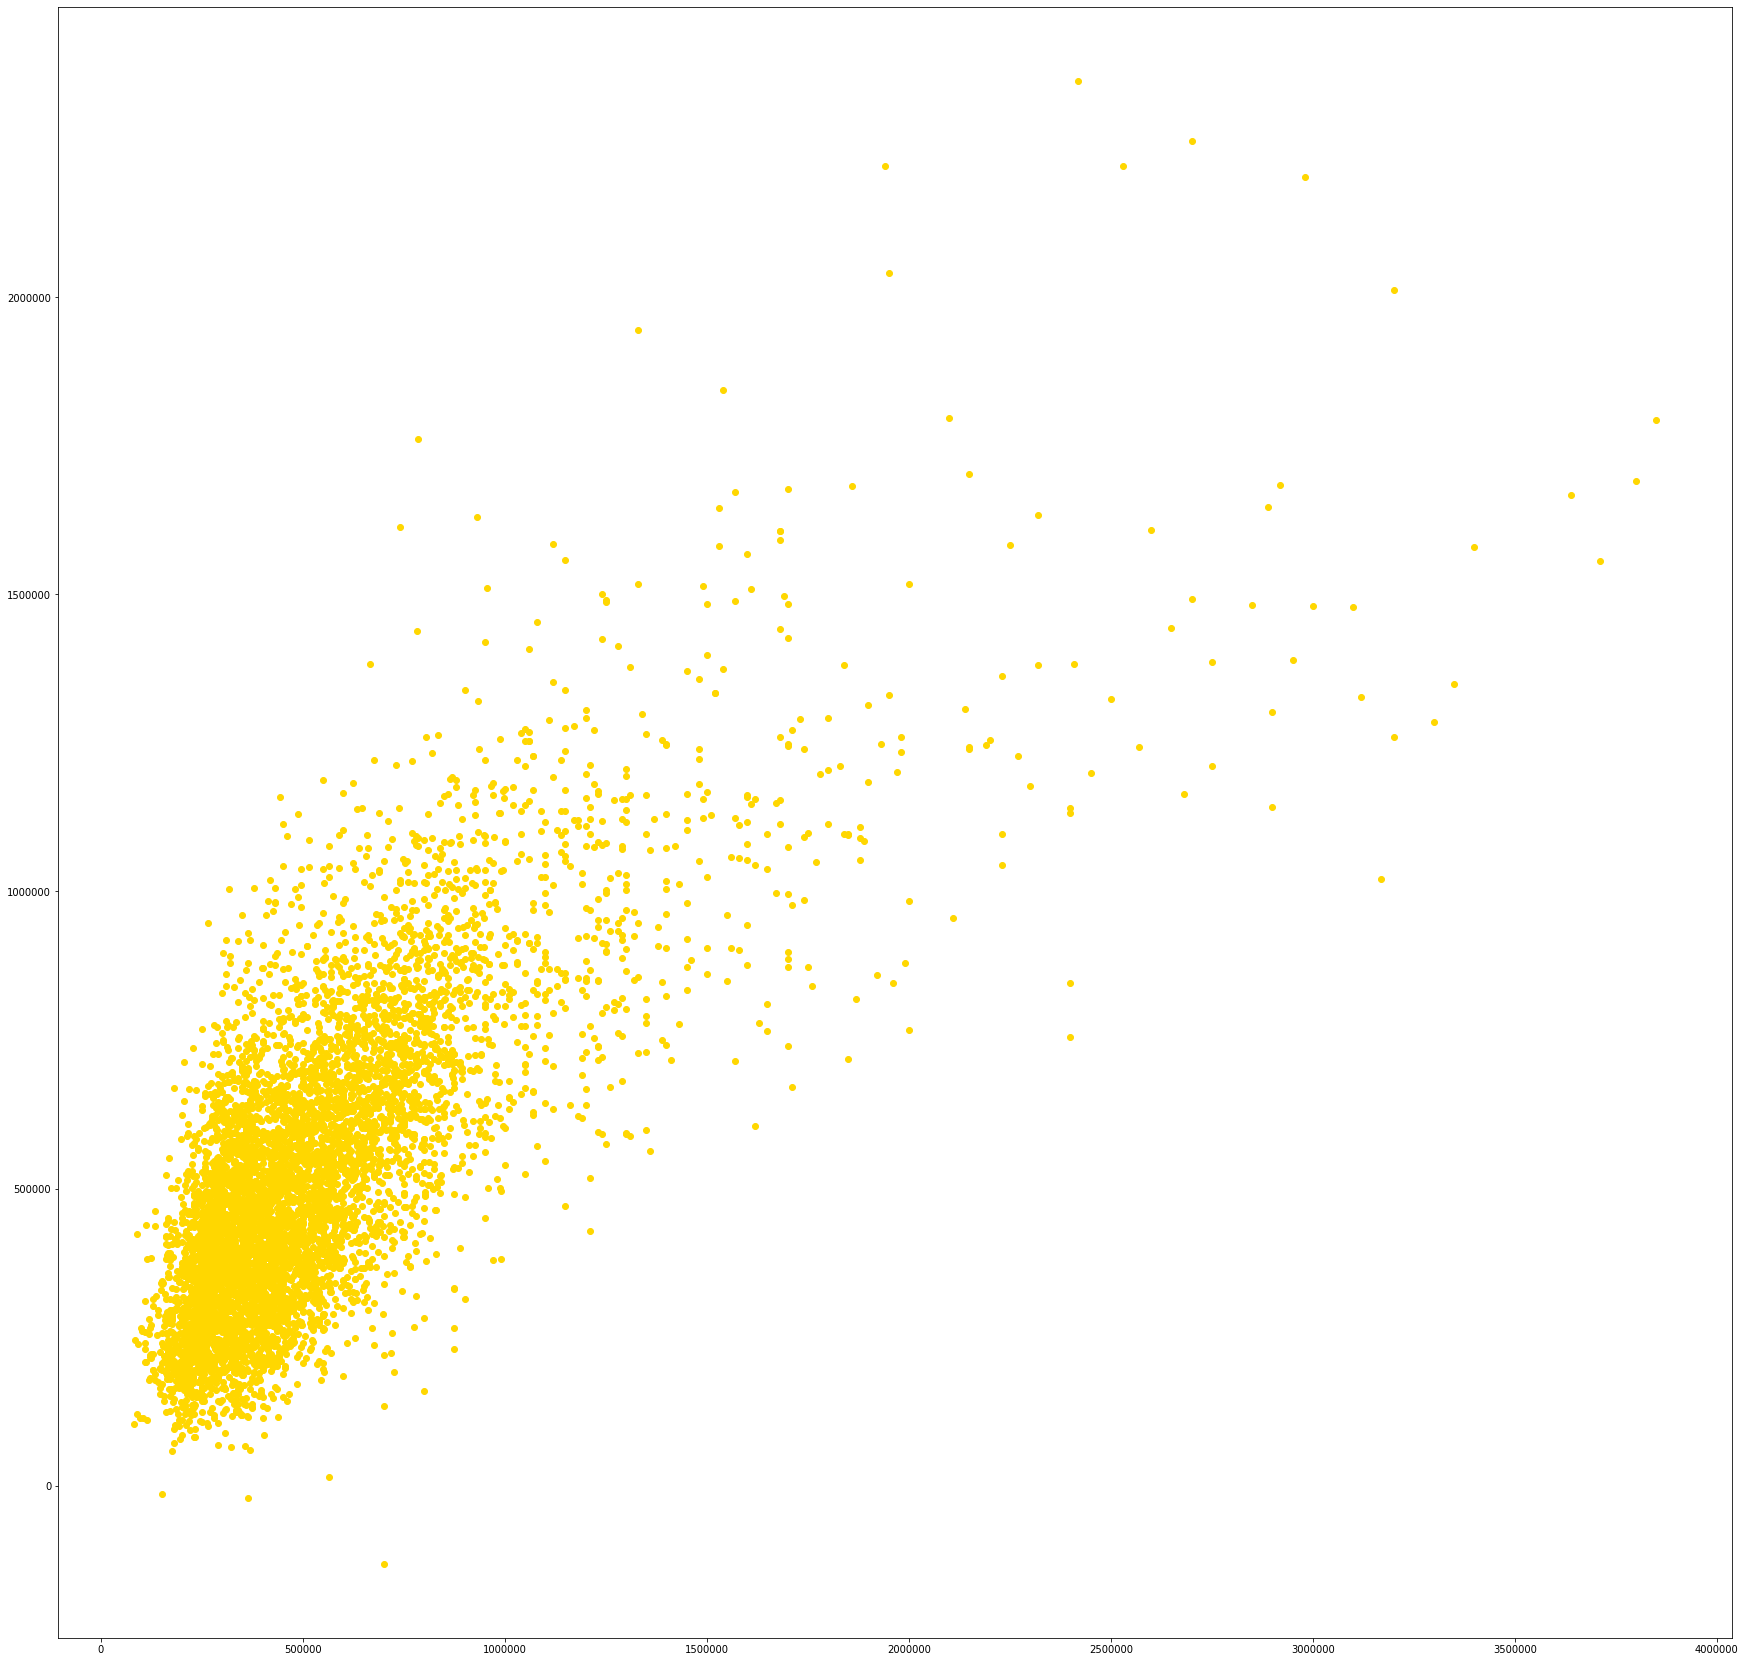

In [131]:
plt.figure(figsize=(30,30))
plt.scatter(y_test, prediction, color='gold')

In [132]:
X.shape

(21597, 10)

In [134]:
model.coef_

array([-6.65160752e+04,  7.16376340e+04,  2.86971125e+02, -1.53169614e-01,
        4.90717765e+04,  2.23042583e+01, -5.27073591e-01, -3.38390574e+03,
        1.75031840e+04,  1.02415743e+02])

In [140]:
dframe_coef = pd.DataFrame(model.coef_, X.columns, columns=['Coeffic Value'])

In [137]:
dframe_coef

,Coeffic Value
bedrooms,-66516.075203
bathrooms,71637.633966
sqft_living,286.971125
sqft_lot,-0.153170
floors,49071.776536
sqft_above,22.304258
sqft_lot15,-0.527074
yr_built,-3383.905736
condition,17503.184043
zipcode,102.415743


In [141]:
model.intercept_

-3522708.5552678984

In [142]:
# RMSE Root Mean Square Error

from sklearn import metrics 

In [144]:
mean_sq_err = metrics.mean_squared_error(y_test, prediction)

In [146]:
RMSE = np.sqrt(mean_sq_err)

In [147]:
RMSE

235044.61457381223

In [196]:
New_X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']]
New_y = house[['price']]

In [197]:
X_train, X_test, y_train, y_test = train_test_split(New_X,New_y, test_size=0.3, random_state=7) 

In [198]:
model2 = LinearRegression()

In [199]:
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
prediction2 = model2.predict(X_test)

In [201]:
prediction2[1]

array([668253.11216876])

In [202]:
prediction[1]

679082.7299224073

In [203]:
house1['price']

1    538000.0
Name: price, dtype: float64

In [204]:
# RMSE for the second model

In [205]:
mean_sq_err2 = metrics.mean_squared_error(y_test, prediction2)

In [206]:
RMSE2 = np.sqrt(mean_sq_err2)

In [207]:
RMSE2

236753.1464772317

In [208]:
RMSE

235044.61457381223

###  (Model 1) did better than the (Model 2). Reason for the optimized performance is ###because we used 10 features for the (Model 1) compared to 6 for the (Model 2.) 

In [209]:
# Using 15 features to determine if it yields calibrated accuracy
F = house[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']]
k = house[['price']]

In [210]:
F_train, F_test, k_train, k_test = train_test_split(F, k, test_size=0.3, random_state=7)

In [211]:
model3 = LinearRegression()

In [212]:
model3.fit(F,k)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
prediction3 = model3.predict(F_test)

In [220]:
prediction3[1]

array([500000.])

In [221]:
mean_sq_err3 = metrics.mean_squared_error(k_test, prediction3)

In [223]:
RMSE3 = np.sqrt(mean_sq_err3)

In [224]:
RMSE3

4.270745789697542e-10

In [225]:
RMSE2

236753.1464772317

In [227]:
RMSE

235044.61457381223

### This concludes our prediction that the more features that we use to train an model, more accurate it predicts.

In [259]:
Percent_Diff3 = print((prediction3[1] - house1['price']) / house1['price'])

1   -0.070632
Name: price, dtype: float64


In [264]:
# Percent Difference from 3rd model 

Per_R_F2 = print((prediction2[1] - house1['price']) / house1['price'])

1    0.242106
Name: price, dtype: float64


In [265]:
Per_R_F1 = print((prediction[1] - house1['price']) / house1['price'])

1    0.262236
Name: price, dtype: float64


### Ultimately Model 3 predicted most accurate. 